# Questão 1:

Implemente uma rede perceptron de múltiplas camadas e utilize-a para aproximar as
funções abaixo.

a. $f(x) = \sin(2x) + \cos(3x)$, onde $0 \leq x \leq 5$

b. $f(x) = 10x^5 + 5x^4 + 2x^3 - 0{,}5x^2 + 3x + 2$, onde $0 \leq x \leq 5$

Para cada função a ser aproximada, gere um conjunto de treinamento e um conjunto de testes.
Nesses conjuntos, cada amostra deve ser representada da seguinte forma: x é a entrada e f(x)
é a saída desejada - rótulo. Treine um perceptron de múltiplas camadas para que ele aprenda a
aproximar a função a partir do conjunto de treinamento, e vá testando com o conjunto de
validação.

Apresente os gráficos das funções reais vs. funções aproximadas e as curvas de erro de
treinamento e validação.

In [66]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import keras

## Utils

In [67]:
def create_train_test_val_sets(function, start, stop, input_size, val_size=0.2, test_size=0.1):
    X = np.linspace(start, stop, input_size)
    y = function(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_size, random_state=42)
    return X, y, X_train, X_test, X_val, y_val, y_train, y_test

In [68]:
def plot_data(X, y, X_train, X_test, X_val, y_val, y_train, y_test):
    _, axs = plt.subplots(3, 2, figsize=(14, 10))

    # 1. X vs Y (full function)
    axs[0, 0].plot(X, y, label='Function')
    axs[0, 0].set_title('X vs Y (Full Function)')
    axs[0, 0].set_xlabel('X')
    axs[0, 0].set_ylabel('Y')
    axs[0, 0].legend()

    # 2. X_train vs y_train
    axs[0, 1].scatter(X_train, y_train, color='green', label='Train Data', alpha=0.7)
    axs[0, 1].set_title('Train Data')
    axs[0, 1].set_xlabel('X')
    axs[0, 1].set_ylabel('Y')
    axs[0, 1].legend()

    # 3. X_test vs y_test
    axs[1, 0].scatter(X_test, y_test, color='red', label='Test Data', alpha=0.7)
    axs[1, 0].set_title('Test Data')
    axs[1, 0].set_xlabel('X')
    axs[1, 0].set_ylabel('Y')
    axs[1, 0].legend()
    
    # 3. X_val vs y_val
    axs[1, 1].scatter(X_val, y_val, color='blue', label='Validation Data', alpha=0.7)
    axs[1, 1].set_title('Val Data')
    axs[1, 1].set_xlabel('X')
    axs[1, 1].set_ylabel('Y')
    axs[1, 1].legend()

    # 4. All together
    axs[2, 0].plot(X, y, label='Function', color='blue')
    axs[2, 0].scatter(X_train, y_train, color='green', label='Train Data', alpha=0.7)
    axs[2, 0].scatter(X_test, y_test, color='red', label='Test Data', alpha=0.7)
    axs[2, 0].scatter(X_val, y_val, color='blue', label='Val Data', alpha=0.7)
    axs[2, 0].set_title('All Together')
    axs[2, 0].set_xlabel('X')
    axs[2, 0].set_ylabel('Y')
    axs[2, 0].legend()

    plt.tight_layout()
    plt.show()


In [69]:
def plot_loss_curve(history):
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Erro de Treino')
    plt.plot(history.history['val_loss'], label='Erro de Validação')
    plt.title('Curva de Erro (Loss)')
    plt.xlabel('Época')
    plt.ylabel('Erro Médio Quadrático (MSE)')
    plt.legend()
    plt.grid(True)
    plt.show()

## a. $f(x) = \sin(2x) + \cos(3x)$, onde $0 \leq x \leq 5$

In [70]:
def function(x):
    return np.sin(2*x) + np.cos(3*x)

In [71]:
X, y, X_train, X_test, X_val, y_val, y_train, y_test = create_train_test_val_sets(function, 0, 5, 100)

In [72]:
print(f"Total samples: {len(X)} - {len(y)}")
print(f"Training samples: {len(X_train)} - {len(y_train)}")
print(f"Validation samples: {len(X_val)} - {len(y_val)}")
print(f"Testing samples: {len(X_test)} - {len(y_test)}")

Total samples: 100 - 100
Training samples: 72 - 72
Validation samples: 18 - 18
Testing samples: 10 - 10


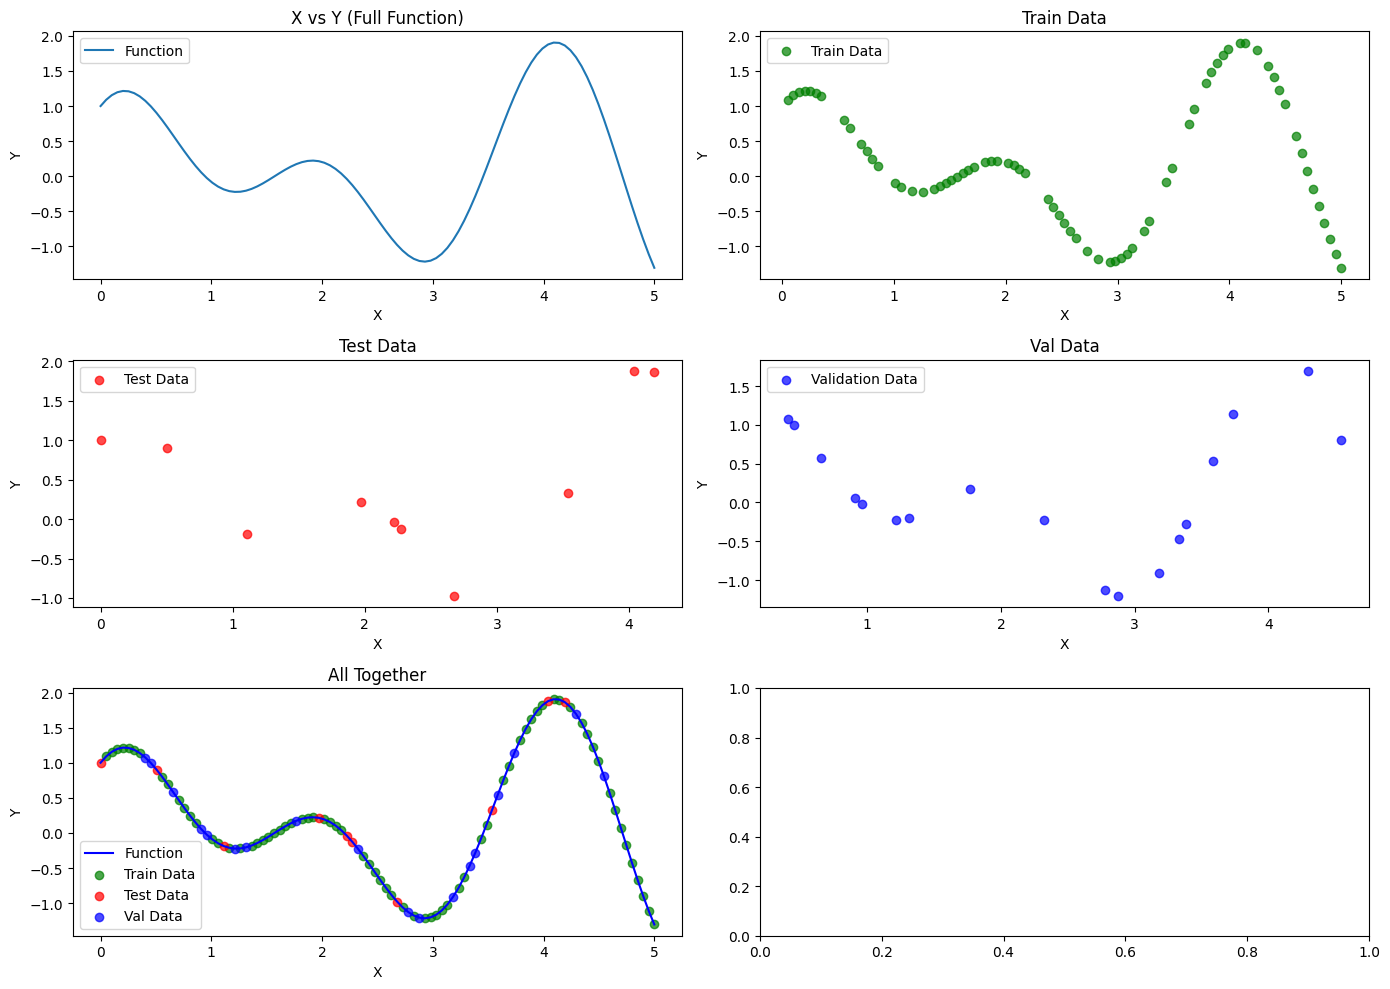

In [73]:
plot_data(X, y, X_train, X_test, X_val, y_val, y_train, y_test)

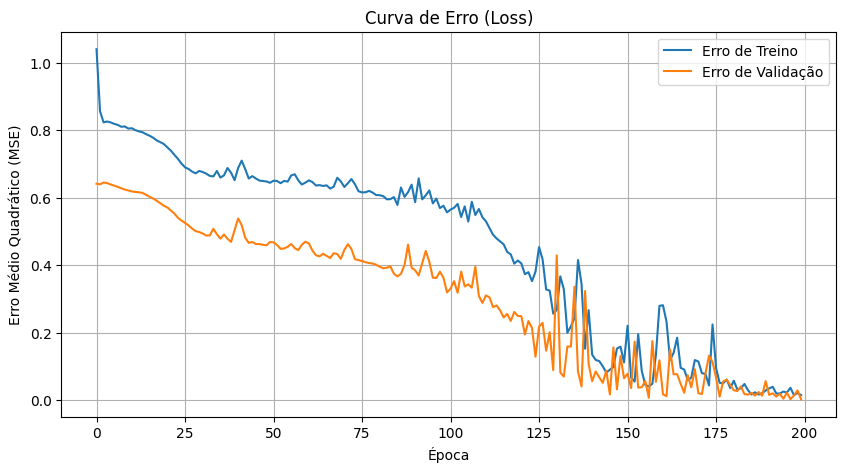

In [74]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(1,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train.reshape(-1, 1),
                    y_train,
                    validation_data=(X_val.reshape(-1, 1), y_val),
                    epochs=200,
                    verbose=0)
plot_loss_curve(history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


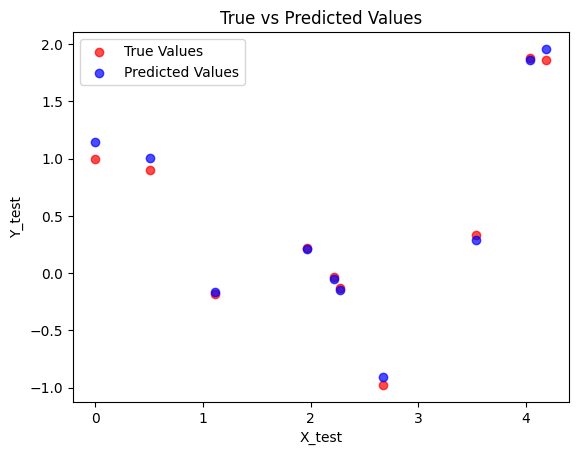

In [75]:
predicted_y = model.predict(X_test.reshape(-1, 1))

plt.scatter(X_test, y_test, color='red', label='True Values', alpha=0.7)
plt.scatter(X_test, predicted_y, color='blue', label='Predicted Values', alpha=0.7)
plt.title('True vs Predicted Values')
plt.xlabel('X_test')
plt.ylabel('Y_test')
plt.legend()
plt.show()

# b. $f(x) = 10x^5 + 5x^4 + 2x^3 - 0{,}5x^2 + 3x + 2$, onde $0 \leq x \leq 5$

In [76]:
def functionb(x):
    return 10*x**5 + 5*x**4 + 2*x**3 - 0.5*x**2 + 3*x + 2

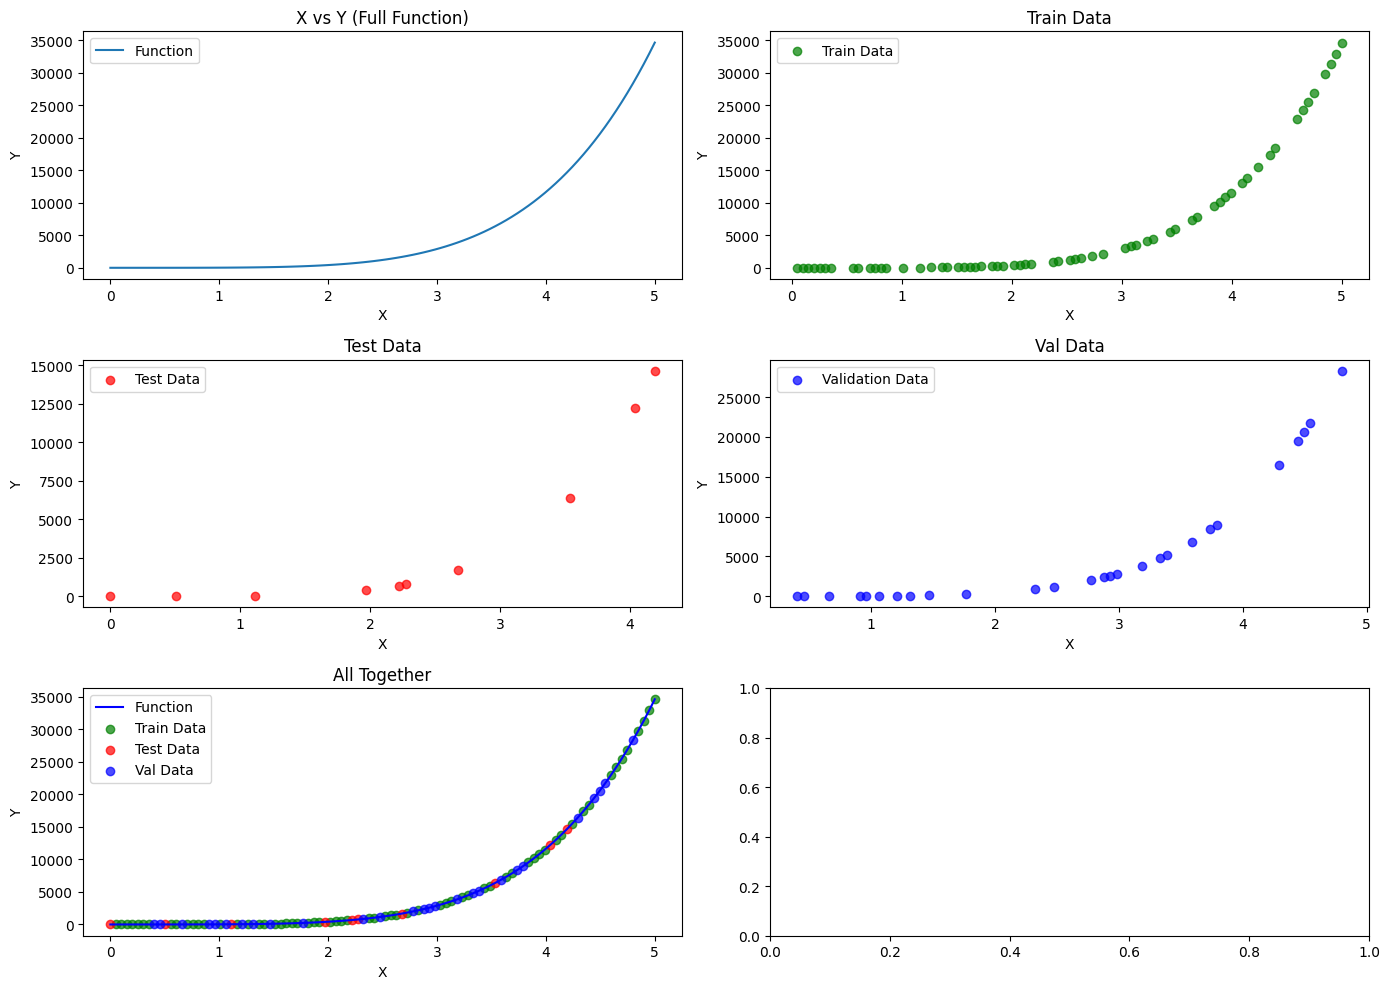

In [77]:
X, y, X_train, X_test, X_val, y_val, y_train, y_test = create_train_test_val_sets(functionb, 0, 5, 100, 0.3)
plot_data(X, y, X_train, X_test, X_val, y_val, y_train, y_test)

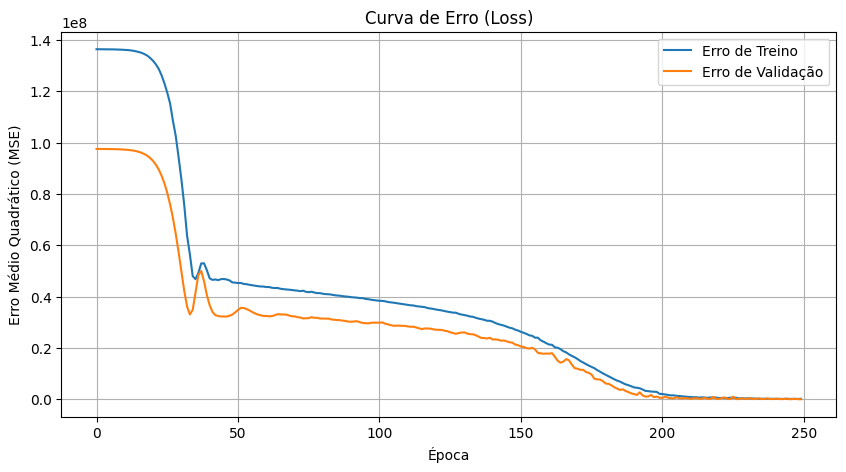

In [78]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(1,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train.reshape(-1, 1),
                    y_train,
                    validation_data=(X_val.reshape(-1, 1), y_val),
                    epochs=250,
                    verbose=False)
plot_loss_curve(history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


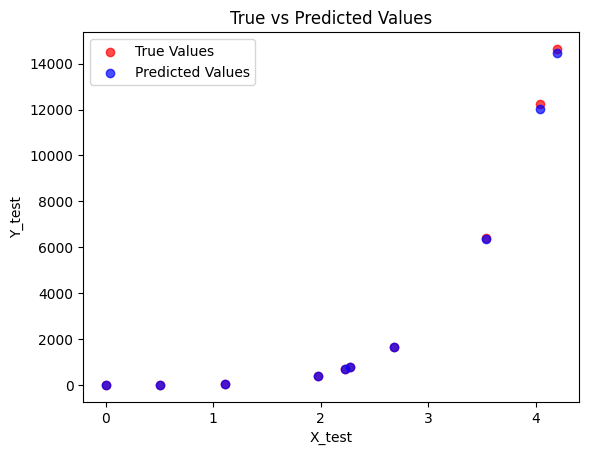

In [79]:
predicted_y = model.predict(X_test.reshape(-1, 1))

plt.scatter(X_test, y_test, color='red', label='True Values', alpha=0.7)
plt.scatter(X_test, predicted_y, color='blue', label='Predicted Values', alpha=0.7)
plt.title('True vs Predicted Values')
plt.xlabel('X_test')
plt.ylabel('Y_test')
plt.legend()
plt.show()